### 1. Problem statement
 - Detecting fraud transactions is of great importance for any credit card company. 
 - We are tasked by a well-known company to detect potential frauds so that customers are not charged for items that they did not purchase.  

 - So the goal is to build a classifier that tells if a transaction is a fraud or not.

### 2. Import library

numpy==1.16.4 for tensorflow 1.14.0

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import keras
import os
import matplotlib.pyplot as plt
import seaborn as sn
import itertools
from collections import Counter
np.random.seed(2)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,roc_auc_score,precision_recall_curve,auc
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


### 3. Data processing

In [2]:
data = pd.read_csv('C:/Users/admin/Downloads/creditcard.csv')

In [3]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


##### run below to understand the error

In [4]:
# scaler = StandardScaler()
# data['NormalizedAmount'] = scaler.fit_transform(data['Amount'])

#### 3.1 Scale data

In [5]:
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

#### 3.2 Split data

In [6]:
data = data.drop(['Amount', 'Time'], axis = 1)
y = data['Class']
X = data.drop(['Class'], axis = 1)

In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 3.3 Convert data

In [9]:
train_identity = X_train.index
test_identity = X_test.index

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### 4. Deep neural network

#### 4.1 Create model

In [11]:
model = Sequential()
#add input layer
model.add(Dense(input_dim = 29, units = 16, activation = 'relu'))
#add 2nd hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add dropout layer
model.add(Dropout(0.5))
#add 3rd hidden layer
model.add(Dense(units = 20, activation = 'relu'))
#add 4th hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add ouptut layer
model.add(Dense(units = 1, activation = 'sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

#### 4.2 Fit model

In [13]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
199364/199364 [==============================] - 14s 71us/step - loss: 0.0095 - accuracy: 0.9979
Epoch 2/5
199364/199364 [==============================] - 15s 78us/step - loss: 0.0038 - accuracy: 0.9993
Epoch 3/5
199364/199364 [==============================] - 15s 74us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/5
199364/199364 [==============================] - 16s 79us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 5/5
199364/199364 [==============================] - 15s 74us/step - loss: 0.0032 - accuracy: 0.9994


#### 4.3 Evaluate model

In [14]:
score = model.evaluate(X_test, y_test)
print(score)

85443/85443 [==============================] - 1s 15us/step
[0.003686112181037318, 0.9993562698364258]


In [15]:
y_pred = model.predict(X_test)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [17]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[85280    16]
 [   39   108]]


Confusion matrix, without normalization


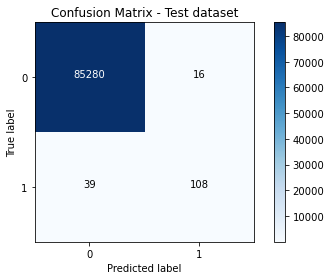

In [18]:
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

In [19]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9993562960102056
0.8709677419354839
0.7346938775510204
0.7970479704797048


#### 4.4 Undersampling & model test

#### 4.4.1 Undersampling

In [20]:
fraud_ind = np.array(data[data.Class == 1].index)
num_frauds = len(fraud_ind)
print(num_frauds)
normal_ind = np.array(data[data.Class == 0].index)
num_normal = len(normal_ind)
print(num_normal)

492
284315


In [21]:
normal_ind = data[data.Class == 0].index
random_normal_ind = np.random.choice(normal_ind, num_frauds, replace = False)
random_normal_ind = np.array(random_normal_ind)

In [22]:
under_sample_ind = np.concatenate( [fraud_ind, random_normal_ind])

In [23]:
print(len(under_sample_ind))

984


In [24]:
under_sample_data = data.iloc[under_sample_ind, :]

In [25]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state=42)

In [27]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### 4.4.2 Model test

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [29]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
688/688 [==============================] - 0s 448us/step - loss: 0.4464 - accuracy: 0.8968
Epoch 2/5
688/688 [==============================] - 0s 81us/step - loss: 0.2139 - accuracy: 0.9172
Epoch 3/5
688/688 [==============================] - 0s 78us/step - loss: 0.1551 - accuracy: 0.9317
Epoch 4/5
688/688 [==============================] - 0s 74us/step - loss: 0.1612 - accuracy: 0.9331
Epoch 5/5
688/688 [==============================] - 0s 80us/step - loss: 0.1454 - accuracy: 0.9404


In [30]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization


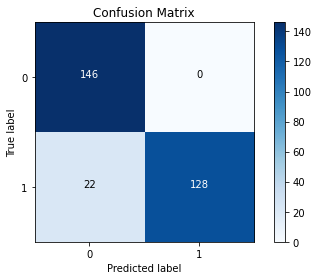

In [31]:
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [32]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9256756756756757
1.0
0.8533333333333334
0.9208633093525179


In [33]:
print("ROC-AUC Score :")
print(roc_auc_score(y_test,y_pred))

print("ROC-PURC Score :")
precision, recall, _ = precision_recall_curve(y_test,y_pred)
auc_score = auc(recall, precision)
print('DNN-UnderSample PR AUC: %.3f' % auc_score)

ROC-AUC Score :
0.9839269406392694
ROC-PURC Score :
DNN-UnderSample PR AUC: 0.990


In [34]:
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       146
           1       1.00      0.85      0.92       150

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296



#### 4.5 SMOTE & Model test

#### 4.5.1 SMOTE

In [35]:
X_resample, y_resample = SMOTE().fit_sample(X, y)

In [36]:
X_resample.shape

(568630, 29)

In [37]:
counter = Counter(y_resample)
print(counter)

Counter({0: 284315, 1: 284315})


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state=42)

In [39]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### 4.5.2 Model test

In [40]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
398041/398041 [==============================] - 32s 79us/step - loss: 0.0307 - accuracy: 0.9894
Epoch 2/5
398041/398041 [==============================] - 30s 76us/step - loss: 0.0139 - accuracy: 0.9963
Epoch 3/5
398041/398041 [==============================] - 28s 70us/step - loss: 0.0114 - accuracy: 0.9970
Epoch 4/5
398041/398041 [==============================] - 29s 74us/step - loss: 0.0104 - accuracy: 0.9974
Epoch 5/5
398041/398041 [==============================] - 29s 72us/step - loss: 0.0096 - accuracy: 0.9977


In [41]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization


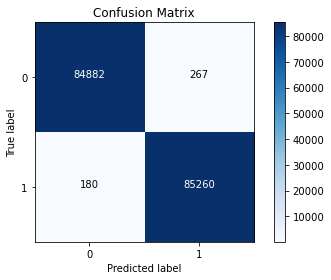

In [42]:
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [43]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9973796669187345
0.9968781788207233
0.9978932584269663
0.9973854603519976


In [44]:
print("ROC-AUC Score :")
print(roc_auc_score(y_test,y_pred))

print("ROC-PURC Score :")
precision, recall, _ = precision_recall_curve(y_test,y_pred)
auc_score = auc(recall, precision)
print('DNN-SMOTE PR AUC: %.3f' % auc_score)

ROC-AUC Score :
0.9997374117915487
ROC-PURC Score :
DNN-SMOTE PR AUC: 1.000


In [46]:
print("DNN - SMOTE")
print(classification_report(y_test,y_pred.round()))

DNN - SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

